# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
# dataDir = "/Users/zarifikram/Documents/Repos/drone-dataset-tools/data/ind"
dataDir = "E:/Datasets/inD-dataset-v1.0/data/"
# dataDir = "G:AV datasets/inD-dataset-v1.0/data"

In [2]:
exec(open('init_notebook.py').read())

current working dirD:\AV\DataSetExploration\drone-dataset-tools\src


In [3]:
%load_ext autoreload
%autoreload 2


In [4]:
import logging
logging.basicConfig(level=logging.INFO)
from loguru import logger
logger.remove()
logger.add(sys.stdout, format="{level} {message}", filter="my_module", level="INFO")

from extractors.loader import Loader

In [5]:
loader = Loader(dataDir, 'inD')

# LocationData - for aggregation

**get all the unique crossing ids**
```
loc2data = loader.getLocationData(2)
loc2data.getUniqueCrossingIds()
```
**get all the crossing data by scene config**
```
loc2data = loader.getLocationData(2, useSceneConfigToExtract=True)
crossingDf = loc2data.getCrossingDf()
```

## First we start from scratch. 

In [9]:
from extractors.LocationData import LocationData
loc2data = loader.getLocationData(2, useSceneConfigToExtract=True, downSampleFps=10)
loc2data.save("../data") # whole thing as a dill object
# loc2data = LocationData.load("../data/location-2", "2023-03-25-fps-5-all.dill")
# loc2data = LocationData.load("../data/location-2", "2023-03-16-fps-5-all.dill")

# loc2data.buildLocalInformationForScenes()

INFO:root:recordingIds: [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
INFO:root:Downsampling recording 18 from 25.0 to 10
downsampling: 100%|█████████████████████████████████████████████████████████| 625989/625989 [00:29<00:00, 21307.85it/s]
INFO:root:Downsampling recording 19 from 25.0 to 10
downsampling:  21%|███████████▊                                             | 101650/492008 [00:04<00:16, 23571.06it/s]


KeyboardInterrupt: 

# Saving and Loading pre--processed Location data

In [8]:
loc2data.saveSceneDataOnly("../data")
loc2data.saveCrossingDf("../data")
loc2data.save("../data") # whole thing as a dill object
loc2data.summary()

{'#original frameRate': 25.0,
 '#crossing trajectories': 1347,
 '#scene trajectories': 1469,
 'scene#10 peds': 572,
 'scene#10 others': 1668,
 'scene#11 peds': 7,
 'scene#11 others': 1212,
 'scene#20 peds': 168,
 'scene#20 others': 2003,
 'scene#21 peds': 52,
 'scene#21 others': 2302,
 'scene#22 peds': 49,
 'scene#22 others': 2221,
 'scene#30 peds': 418,
 'scene#30 others': 1467,
 'scene#31 peds': 19,
 'scene#31 others': 134,
 'scene#40 peds': 184,
 'scene#40 others': 1171}

In [36]:
from extractors.LocationData import LocationData
# loc2dataFromFile = LocationData.load("../data/location-2/", "2022-12-03-fps-5-before-local.dill")
loc2dataFromFile = LocationData.load("../data/location-2", "2023-03-25-fps-5-all.dill")
loc2dataFromFile.buildLocalInformationForScenes()

INFO:root:SceneData 10: moving outlier peds to others. We should only find outliers in the clipped trajectories?
INFO:root:Scene 10: clipping original data


using range (0.0, 3.0)


clipping ped trajectories for scene # 10 with width offset 4.0: 100%|████████████████████████████| 36/36 [00:00<00:00, 97.47it/s]
clipping other trajectories for scene # 10: 100%|█████████████████████████████████████████████| 119/119 [00:01<00:00, 116.45it/s]
INFO:root:Scene 10: transforming trajectories to scene coordinates
INFO:root:Scene 10: adding dynamics
INFO:root:Scene 10: trimming head and tail
INFO:root:Scene 10: clipping trimmed data
clipping ped trajectories for scene # 10 with width offset 0.0: 100%|███████████████████████████| 36/36 [00:00<00:00, 230.47it/s]
INFO:root:Scene 10: building clipped track meta
INFO:root:SceneData 20: moving outlier peds to others. We should only find outliers in the clipped trajectories?
INFO:root:Scene 20: clipping original data


fast_pedestrian 18156: moving 18156 to others as speed is unrealistic
fast_pedestrian 18319: moving 18319 to others as speed is unrealistic
fast_pedestrian 18322: moving 18322 to others as speed is unrealistic
fast_pedestrian 18396: moving 18396 to others as speed is unrealistic
fast_pedestrian 18408: moving 18408 to others as speed is unrealistic
pedestrian 18388: enters the scene 2 times
bicycle 18045: enters the scene 4 times
bicycle 18045: Disregarding as the length 0.10516475122397448 is too short or rows too less (26)
bicycle 18045: Disregarding as the length 0.09814129660851399 is too short or rows too less (30)
bicycle 18045: Disregarding as the length 0.08265402107580888 is too short or rows too less (3)
fast_pedestrian 18408: enters the scene 3 times
Clipping after trimming lost 2 pedestrian tracks: {1838800, 1838801}
problematic tracks: defaultdict(<function SceneData.buildLocalInformation.<locals>.<lambda> at 0x7fcd25db3af0>, {'fast_pedestrian': {18408, 18156, 18319, 18322,

clipping ped trajectories for scene # 20 with width offset 4.0: 100%|████████████████████████████| 13/13 [00:00<00:00, 85.83it/s]
clipping other trajectories for scene # 20: 100%|█████████████████████████████████████████████| 142/142 [00:01<00:00, 119.71it/s]
INFO:root:Scene 20: transforming trajectories to scene coordinates
INFO:root:Scene 20: adding dynamics
INFO:root:Scene 20: trimming head and tail
INFO:root:Scene 20: clipping trimmed data
clipping ped trajectories for scene # 20 with width offset 0.0: 100%|███████████████████████████| 13/13 [00:00<00:00, 192.41it/s]
INFO:root:Scene 20: building clipped track meta
INFO:root:SceneData 21: moving outlier peds to others. We should only find outliers in the clipped trajectories?
INFO:root:Scene 21: clipping original data



problematic tracks: defaultdict(<function SceneData.buildLocalInformation.<locals>.<lambda> at 0x7fcd10678e50>, {'fast_pedestrian': set()})
using range (0.0, 3.0)


clipping ped trajectories for scene # 21 with width offset 4.0: 100%|██████████████████████████████| 5/5 [00:00<00:00, 73.27it/s]
clipping other trajectories for scene # 21: 100%|█████████████████████████████████████████████| 153/153 [00:01<00:00, 123.98it/s]
INFO:root:Scene 21: transforming trajectories to scene coordinates
INFO:root:Scene 21: adding dynamics
INFO:root:Scene 21: trimming head and tail
INFO:root:Scene 21: clipping trimmed data
clipping ped trajectories for scene # 21 with width offset 0.0: 100%|█████████████████████████████| 5/5 [00:00<00:00, 248.52it/s]
INFO:root:Scene 21: building clipped track meta
INFO:root:SceneData 22: moving outlier peds to others. We should only find outliers in the clipped trajectories?
INFO:root:Scene 22: clipping original data


fast_pedestrian 18379: moving 18379 to others as speed is unrealistic
pedestrian 18074: enters the scene 2 times
pedestrian 18116: enters the scene 2 times
Clipping after trimming lost 4 pedestrian tracks: {1807400, 1807401, 1811601, 1811600}
problematic tracks: defaultdict(<function SceneData.buildLocalInformation.<locals>.<lambda> at 0x7fcd25db3280>, {'fast_pedestrian': {18379}})
using range (0.0, 3.0)


clipping ped trajectories for scene # 22 with width offset 4.0: 100%|██████████████████████████████| 4/4 [00:00<00:00, 84.37it/s]
clipping other trajectories for scene # 22: 100%|█████████████████████████████████████████████| 150/150 [00:01<00:00, 125.44it/s]
INFO:root:Scene 22: transforming trajectories to scene coordinates
INFO:root:Scene 22: adding dynamics
INFO:root:Scene 22: trimming head and tail
INFO:root:Scene 22: clipping trimmed data
clipping ped trajectories for scene # 22 with width offset 0.0: 100%|█████████████████████████████| 4/4 [00:00<00:00, 133.41it/s]
INFO:root:Scene 22: building clipped track meta
INFO:root:SceneData 30: moving outlier peds to others. We should only find outliers in the clipped trajectories?
INFO:root:Scene 30: clipping original data



problematic tracks: defaultdict(<function SceneData.buildLocalInformation.<locals>.<lambda> at 0x7fcd22eefb80>, {'fast_pedestrian': set()})
using range (0.0, 3.0)


clipping ped trajectories for scene # 30 with width offset 4.0: 100%|████████████████████████████| 36/36 [00:00<00:00, 78.82it/s]
clipping other trajectories for scene # 30: 100%|█████████████████████████████████████████████| 108/108 [00:00<00:00, 119.46it/s]
INFO:root:Scene 30: transforming trajectories to scene coordinates
INFO:root:Scene 30: adding dynamics
INFO:root:Scene 30: trimming head and tail
INFO:root:Scene 30: clipping trimmed data
clipping ped trajectories for scene # 30 with width offset 0.0: 100%|███████████████████████████| 36/36 [00:00<00:00, 199.26it/s]
INFO:root:Scene 30: building clipped track meta
INFO:root:SceneData 31: moving outlier peds to others. We should only find outliers in the clipped trajectories?
INFO:root:Scene 31: clipping original data


fast_pedestrian 18020: moving 18020 to others as speed is unrealistic
fast_pedestrian 18026: moving 18026 to others as speed is unrealistic
fast_pedestrian 18072: moving 18072 to others as speed is unrealistic
fast_pedestrian 18100: moving 18100 to others as speed is unrealistic
fast_pedestrian 18148: moving 18148 to others as speed is unrealistic
fast_pedestrian 18353: moving 18353 to others as speed is unrealistic
fast_pedestrian 18396: moving 18396 to others as speed is unrealistic
fast_pedestrian 18408: moving 18408 to others as speed is unrealistic
fast_pedestrian 18409: moving 18409 to others as speed is unrealistic
bicycle 18358: enters the scene 2 times
fast_pedestrian 18396: enters the scene 2 times
problematic tracks: defaultdict(<function SceneData.buildLocalInformation.<locals>.<lambda> at 0x7fcd22eef670>, {'fast_pedestrian': {18020, 18148, 18408, 18409, 18026, 18353, 18100, 18072, 18396}})
using range (0.0, 3.0)


clipping ped trajectories for scene # 31 with width offset 4.0: 100%|██████████████████████████████| 1/1 [00:00<00:00, 92.12it/s]
clipping other trajectories for scene # 31: 100%|█████████████████████████████████████████████████| 7/7 [00:00<00:00, 138.35it/s]
INFO:root:Scene 31: transforming trajectories to scene coordinates
INFO:root:Scene 31: adding dynamics
INFO:root:Scene 31: trimming head and tail
INFO:root:Scene 31: clipping trimmed data
clipping ped trajectories for scene # 31 with width offset 0.0: 100%|█████████████████████████████| 1/1 [00:00<00:00, 155.23it/s]
INFO:root:Scene 31: building clipped track meta
INFO:root:SceneData 40: moving outlier peds to others. We should only find outliers in the clipped trajectories?



problematic tracks: defaultdict(<function SceneData.buildLocalInformation.<locals>.<lambda> at 0x7fcd103c8b80>, {'fast_pedestrian': set()})
using range (0.0, 3.0)


INFO:root:Scene 40: clipping original data
clipping ped trajectories for scene # 40 with width offset 4.0: 100%|██████████████████████████████| 8/8 [00:00<00:00, 71.21it/s]
clipping other trajectories for scene # 40: 100%|███████████████████████████████████████████████| 68/68 [00:00<00:00, 152.07it/s]
INFO:root:Scene 40: transforming trajectories to scene coordinates
INFO:root:Scene 40: adding dynamics
INFO:root:Scene 40: trimming head and tail
INFO:root:Scene 40: clipping trimmed data
clipping ped trajectories for scene # 40 with width offset 0.0: 100%|█████████████████████████████| 8/8 [00:00<00:00, 198.79it/s]
INFO:root:Scene 40: building clipped track meta



problematic tracks: defaultdict(<function SceneData.buildLocalInformation.<locals>.<lambda> at 0x7fcd10889af0>, {'fast_pedestrian': set()})


In [9]:
# loc2dataFromFile.saveCrossingDf("../data")
# loc2dataFromFile.saveSceneDataOnly("../data")
# loc2dataFromFile.save("../data") # whole thing as a dill object
loc2dataFromFile.summary()

NameError: name 'loc2dataFromFile' is not defined

In [ ]:
from extractors.LocationData import LocationData
loc2dataFromFile = LocationData.load("../data/location-2", "2022-11-12-all.dill")

# Validate if there are trajectories not captured by the scene-based extractor

In [10]:
from tools.TrajectoryUtils import TrajectoryUtils
from tools.TrajectoryVisualizer import TrajectoryVisualizer
import matplotlib.pyplot as plt
import numpy as np
visualizer = TrajectoryVisualizer(loader)

In [ ]:
# visualizer.showLocationCrossingTracks(loc2data)

In [11]:
sceneData = loc2data.getSceneData(40, 10, 5, refresh=False)
# sceneData = loc2data.getSceneData(10, 10, 5, refresh=False)
# dir(sceneData)
# sceneData.pedData
# sceneDf = loc2data.getSceneCrossingDf('10', 0, 0)
clippedPedDf = sceneData.getPedDataInSceneCoordinates()
clippedPedDf.head()
# sceneData.pedData.head()

,index,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,...,uniqueTrackId,sceneId,roadWidth,speed,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration
0,25670,29,0,305,305,40.3324,-18.13426,20.85951,0.0,0.0,...,29000,40,6.0,1.937883,2.258668,2.981444,0.635640,1.328971,0.071140,-0.094430
1,25671,29,0,310,310,40.6066,-18.03462,22.11917,0.0,0.0,...,29000,40,6.0,1.869378,2.136437,2.716542,0.611159,1.324511,0.122406,0.022299
2,25672,29,0,315,315,40.86714,-17.92886,23.2443,0.0,0.0,...,29000,40,6.0,1.748520,2.028167,2.457034,0.541348,1.297536,0.349056,0.134875
3,25673,29,0,320,320,41.10369,-17.8069,24.22287,0.0,0.0,...,29000,40,6.0,1.599546,1.948291,2.203165,0.399381,1.269350,0.709833,0.140932
4,25674,29,0,325,325,41.31878,-17.67361,25.04625,0.0,0.0,...,29000,40,6.0,1.439882,1.891568,1.956563,0.283614,1.233009,0.578832,0.181703


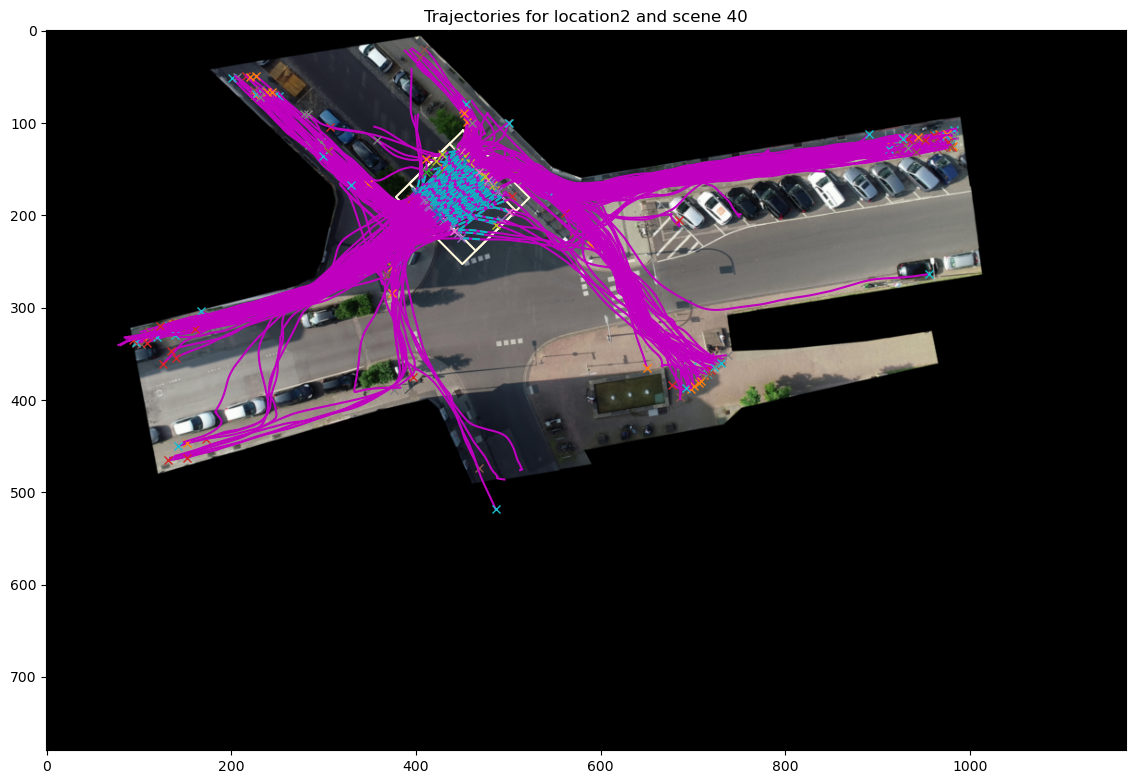

In [12]:
visualizer.showLocationSceneData(sceneData)

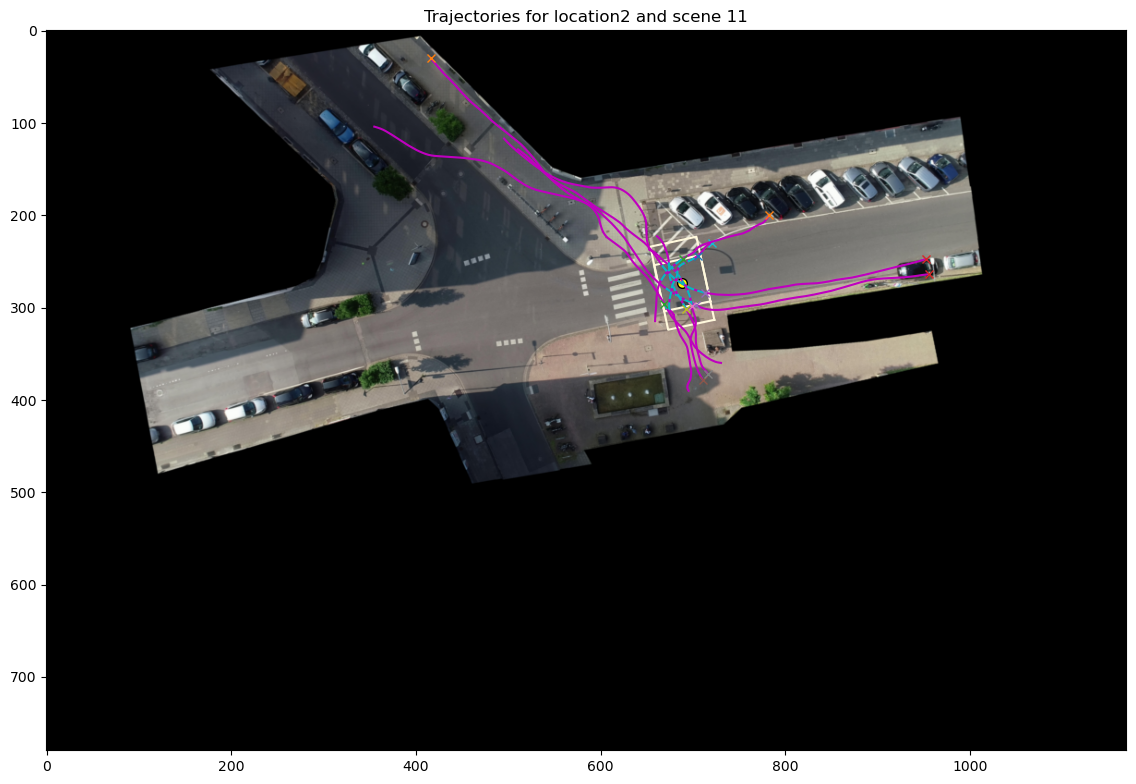

In [42]:
scene11Data = loc2data.getSceneData(11, 10, 6, refresh=False)

visualizer.showLocationSceneData(scene11Data)

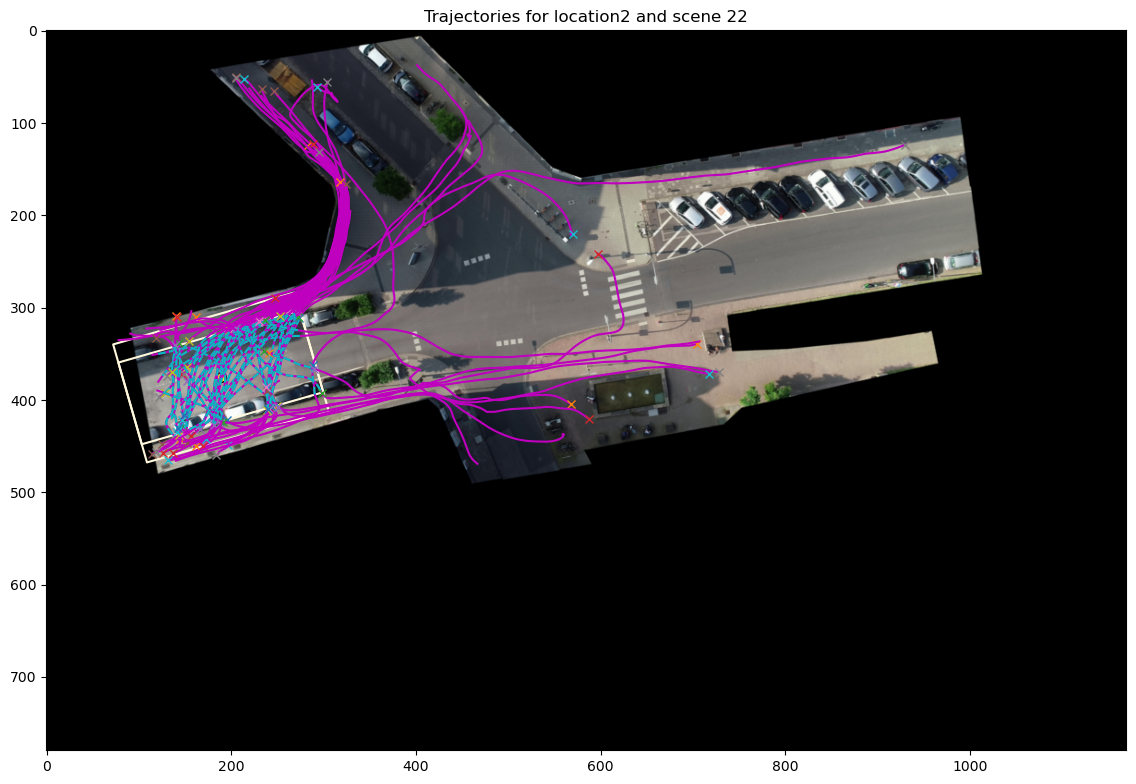

In [41]:
# scene20Data = loc2data.getSceneData(20, 10, 6, refresh=False)
# visualizer.showLocationSceneData(scene20Data)

# scene21Data = loc2data.getSceneData(21, 20, 9, refresh=False)
# visualizer.showLocationSceneData(scene21Data, onlyClipped=False)

# scene22Data = loc2data.getSceneData(22, 10, 6, refresh=False)
# visualizer.showLocationSceneData(scene22Data)

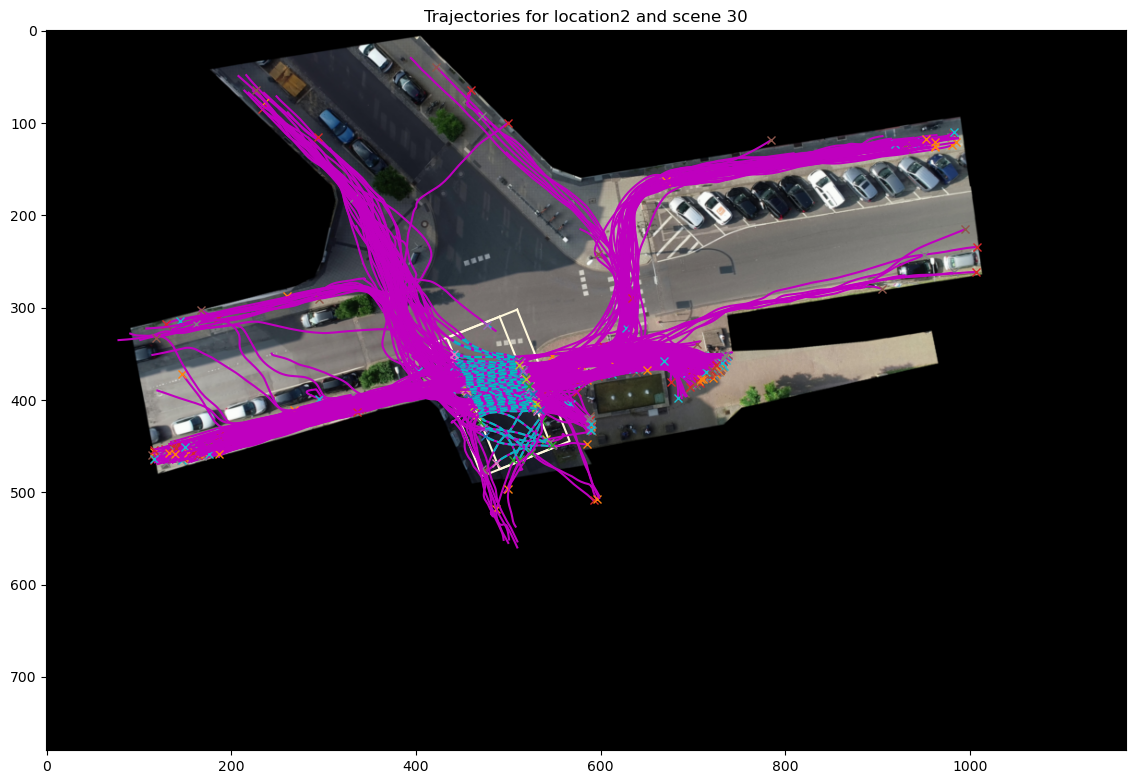

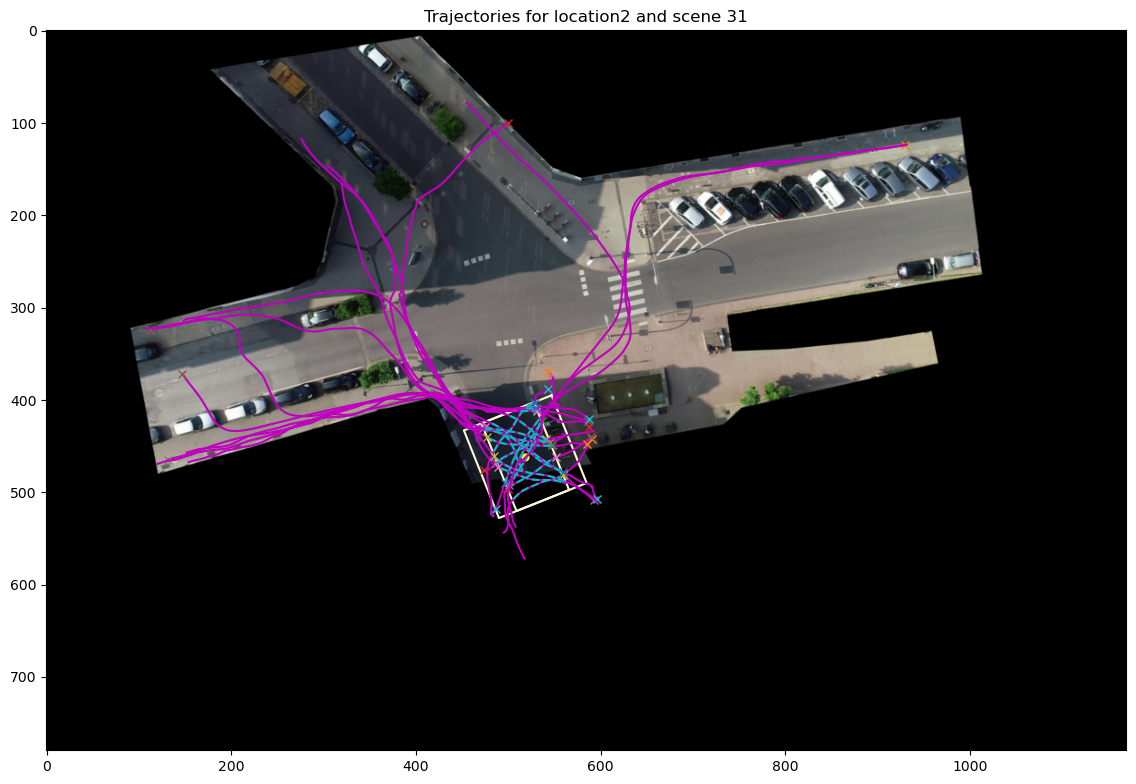

In [19]:
# scene30Data = loc2data.getSceneData(30, 10, 6, refresh=False)
# visualizer.showLocationSceneData(scene30Data)

# scene31Data = loc2data.getSceneData(31, 10, 6, refresh=False)
# visualizer.showLocationSceneData(scene31Data)

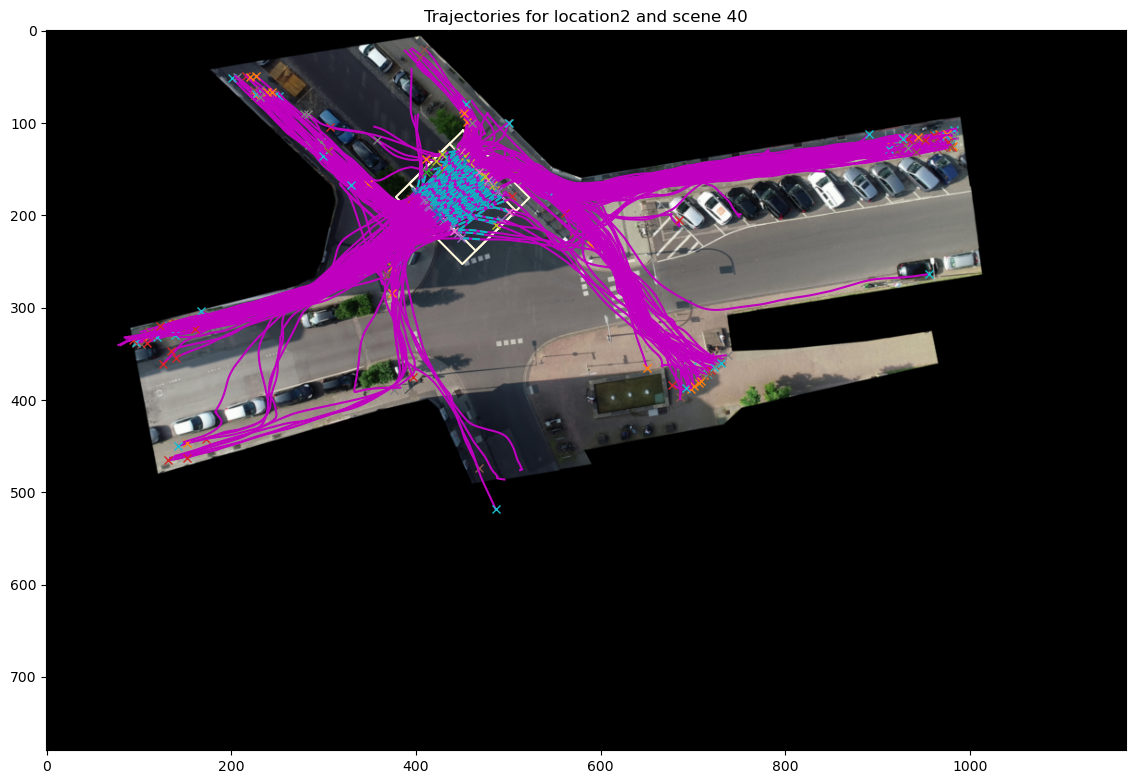

In [20]:
scene40Data = loc2data.getSceneData(40, 6, 6, refresh=False)
visualizer.showLocationSceneData(scene40Data)

In [78]:
from shapely.geometry import box, Point
from shapely.affinity import rotate, affine_transform
b = box(2, 1, -1, 5)
for x, y in b.exterior.coords:
    print(x, y)

-1.0 1.0
-1.0 5.0
2.0 5.0
2.0 1.0
-1.0 1.0


In [76]:
c = rotate(b, -45)
for x, y in c.exterior.coords:
    print(x, y)

-1.9748737341529163 2.646446609406726
0.8535533905932737 5.474873734152917
2.974873734152917 3.353553390593274
0.1464466094067267 0.5251262658470838
-1.9748737341529163 2.646446609406726


In [70]:
from tools.TrajectoryUtils import TrajectoryUtils

In [77]:
d = TrajectoryUtils.boxRotate(b, -45)
for x, y in d.exterior.coords:
    print(x, y)

-1.9748737341529163 2.646446609406726
0.8535533905932737 5.474873734152917
2.974873734152917 3.353553390593274
0.1464466094067267 0.5251262658470838
-1.9748737341529163 2.646446609406726


In [83]:
e = TrajectoryUtils.boxAffineTransform(b, [1, 2, 3, 4, 5, 6])
for x, y in e.exterior.coords:
    print(x, y)

6.0 7.0
14.0 23.0
17.0 32.0
9.0 16.0
6.0 7.0


In [82]:
f = affine_transform(b, [1, 2, 3, 4, 5, 6])
for x, y in f.exterior.coords:
    print(x, y)

6.0 7.0
14.0 23.0
17.0 32.0
9.0 16.0
6.0 7.0


29